In [1]:
suppressMessages(library(tidyverse))

Warning message:
"package 'tibble' was built under R version 4.1.2"
Warning message:
"package 'tidyr' was built under R version 4.1.2"
Warning message:
"package 'readr' was built under R version 4.1.2"
Warning message:
"package 'dplyr' was built under R version 4.1.2"


In [2]:
df <- read_csv("figshareaustralia/combined_data.csv")
dfm <- read_csv("figshareaustralia/monthly_aggregation.csv")

Rows: 62467843 Columns: 7
-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): model
dbl  (5): lat_min, lat_max, lon_min, lon_max, rain (mm/day)
dttm (1): time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
* `` -> ...1

Rows: 40824 Columns: 10
-- Column specification -------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): model, month
dbl  (7): ...1, lat_min, lat_max, lon_min, lon_max, rain (mm/day), log_rain
dttm (1): time

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
head(df)

time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1889-01-01 12:00:00,-36.25,-35,140.625,142.5,3.293256e-13,ACCESS-CM2
1889-01-02 12:00:00,-36.25,-35,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-03 12:00:00,-36.25,-35,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-04 12:00:00,-36.25,-35,140.625,142.5,0.000000e+00,ACCESS-CM2
1889-01-05 12:00:00,-36.25,-35,140.625,142.5,1.047658e-02,ACCESS-CM2
1889-01-06 12:00:00,-36.25,-35,140.625,142.5,3.292260e-02,ACCESS-CM2


In [6]:
str(df)

spec_tbl_df [62,467,843 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ time         : POSIXct[1:62467843], format: "1889-01-01 12:00:00" "1889-01-02 12:00:00" ...
 $ lat_min      : num [1:62467843] -36.2 -36.2 -36.2 -36.2 -36.2 ...
 $ lat_max      : num [1:62467843] -35 -35 -35 -35 -35 -35 -35 -35 -35 -35 ...
 $ lon_min      : num [1:62467843] 141 141 141 141 141 ...
 $ lon_max      : num [1:62467843] 142 142 142 142 142 ...
 $ rain (mm/day): num [1:62467843] 3.29e-13 0.00 0.00 0.00 1.05e-02 ...
 $ model        : chr [1:62467843] "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" "ACCESS-CM2" ...
 - attr(*, "spec")=
  .. cols(
  ..   time = col_datetime(format = ""),
  ..   lat_min = col_double(),
  ..   lat_max = col_double(),
  ..   lon_min = col_double(),
  ..   lon_max = col_double(),
  ..   `rain (mm/day)` = col_double(),
  ..   model = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [7]:
summary(df)

      time                        lat_min           lat_max      
 Min.   :1889-01-01 00:00:00   Min.   :-36       Min.   :-36.00  
 1st Qu.:1920-07-02 12:00:00   1st Qu.:-35       1st Qu.:-33.66  
 Median :1952-01-01 12:00:00   Median :-33       Median :-32.04  
 Mean   :1952-01-01 16:32:09   Mean   :-33       Mean   :-31.98  
 3rd Qu.:1983-07-02 12:00:00   3rd Qu.:-31       3rd Qu.:-30.16  
 Max.   :2014-12-31 12:00:00   Max.   :-30       Max.   :-27.91  
                               NA's   :3219300                   
    lon_min           lon_max      rain (mm/day)        model          
 Min.   :141       Min.   :141.2   Min.   :  0       Length:62467843   
 1st Qu.:143       1st Qu.:145.0   1st Qu.:  0       Class :character  
 Median :147       Median :148.1   Median :  0       Mode  :character  
 Mean   :147       Mean   :148.2   Mean   :  2                         
 3rd Qu.:150       3rd Qu.:151.3   3rd Qu.:  1                         
 Max.   :154       Max.   :155.6   Max. 

In [8]:
dim(df)

[1] 62467843        7

In [10]:
df <- df |>
    drop_na() |>
    mutate(log_rain = log(1+`rain (mm/day)`))

In [ ]:
all_raindata_plot <-ggplot(df, aes(x=log_rain, y=model, color=model)) +
                  geom_boxplot()
all_raindata_plot

In [5]:
dfm <- dfm |>
    mutate(month = fct_relevel(month, c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")))

Warning message:
"Removed 1512 rows containing non-finite values (stat_boxplot)."


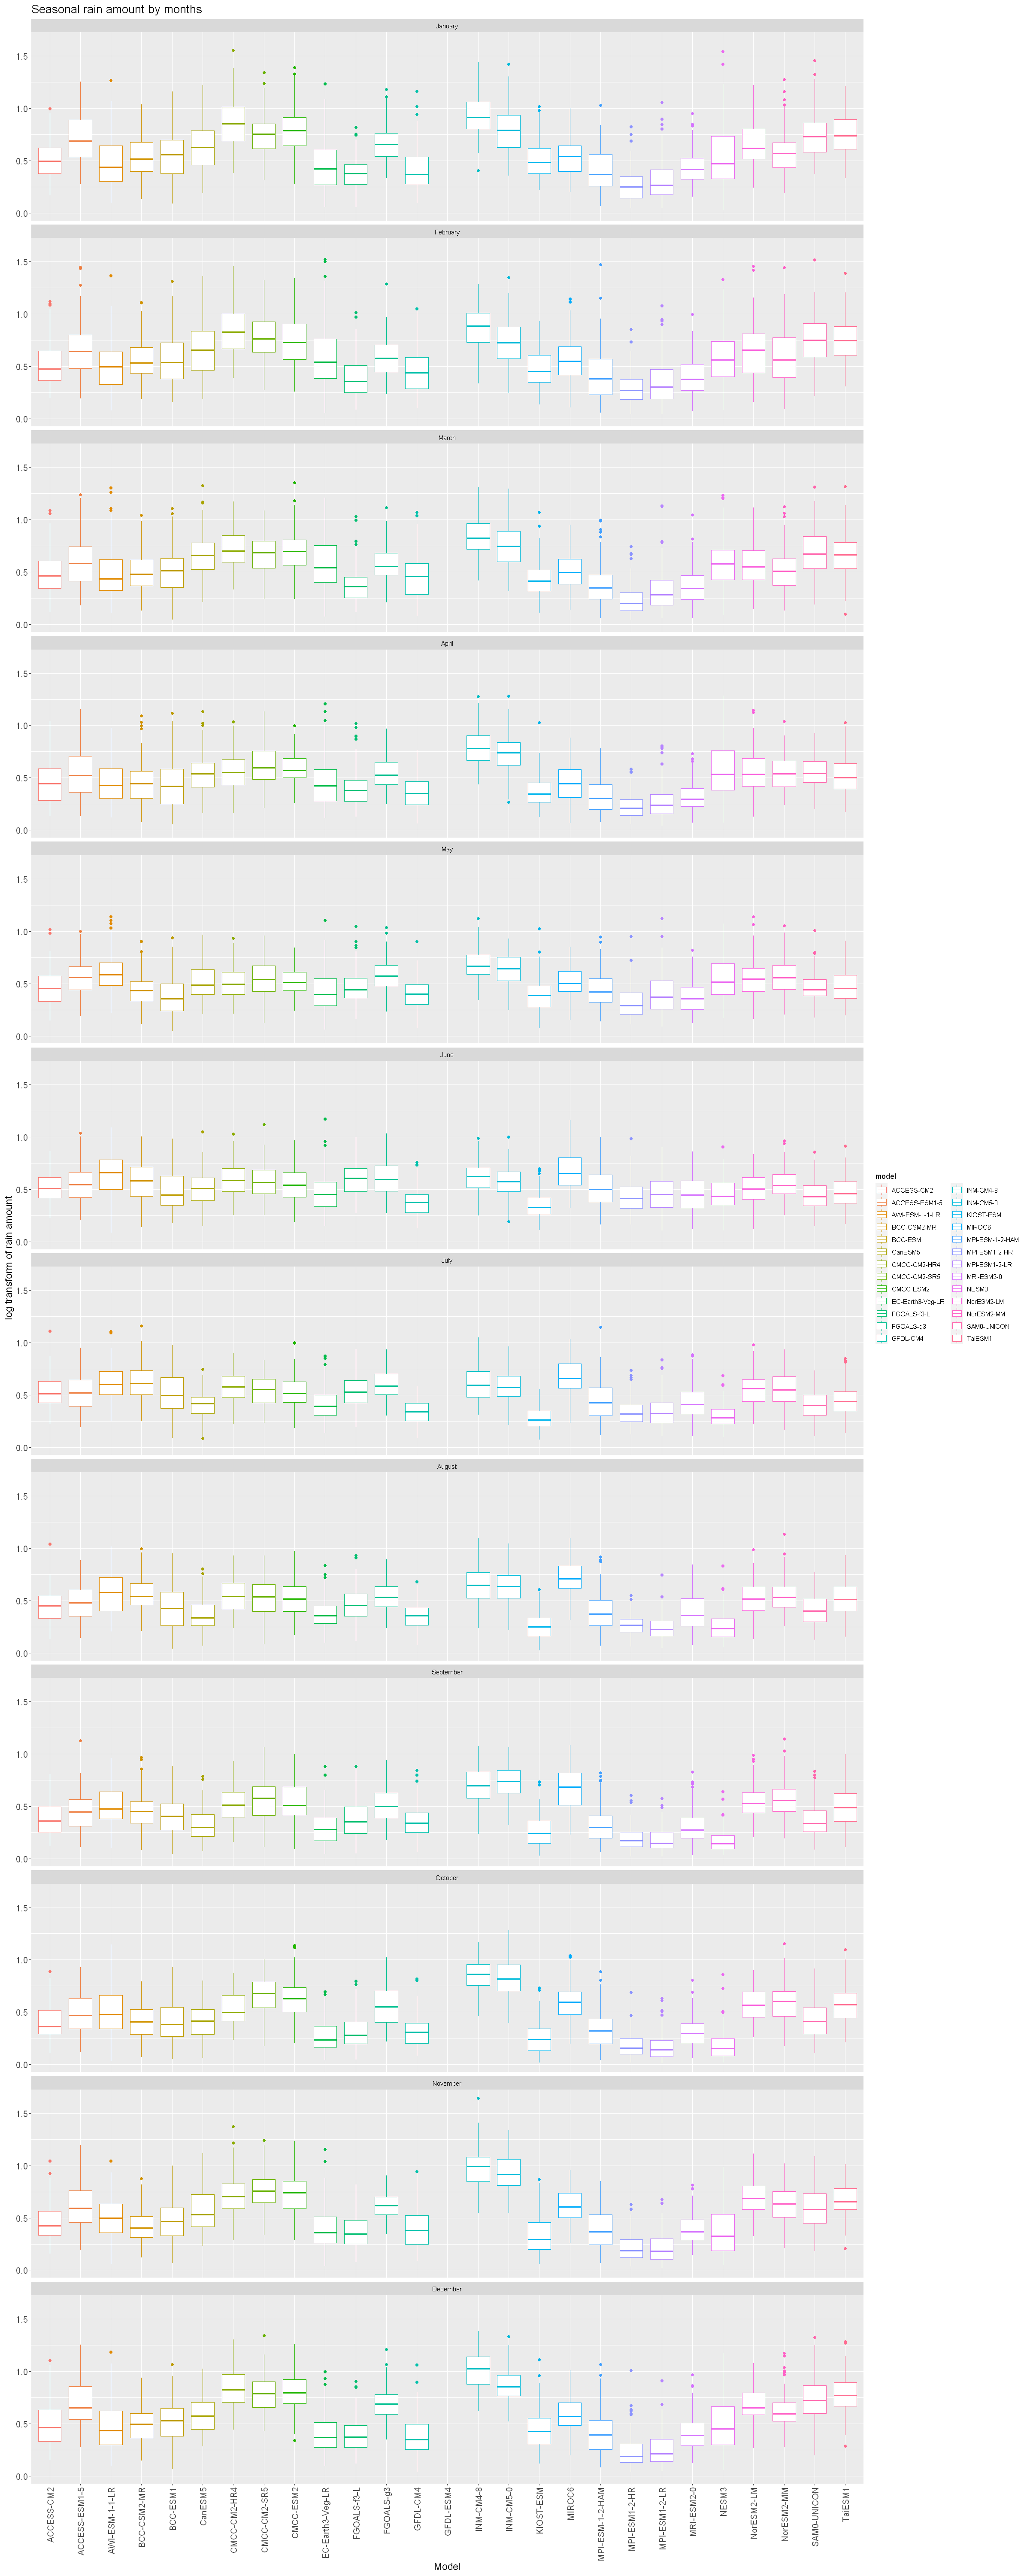

In [11]:
options(repr.plot.width=20, repr.plot.height=50)
monthly_plot <-ggplot(dfm, aes(x=model, y=log_rain, color=model)) +
                  geom_boxplot() +
                  labs(x = "Model", 
                       y = "log transform of rain amount", 
                       title = "Seasonal rain amount by months") +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
                       plot.title = element_text(size = 16),
                       axis.text = element_text(size = 12),
                       axis.title = element_text(size = 14)) + 
                  facet_wrap(~month, ncol = 1)       
monthly_plot

Warning message:
"Removed 1512 rows containing non-finite values (stat_boxplot)."


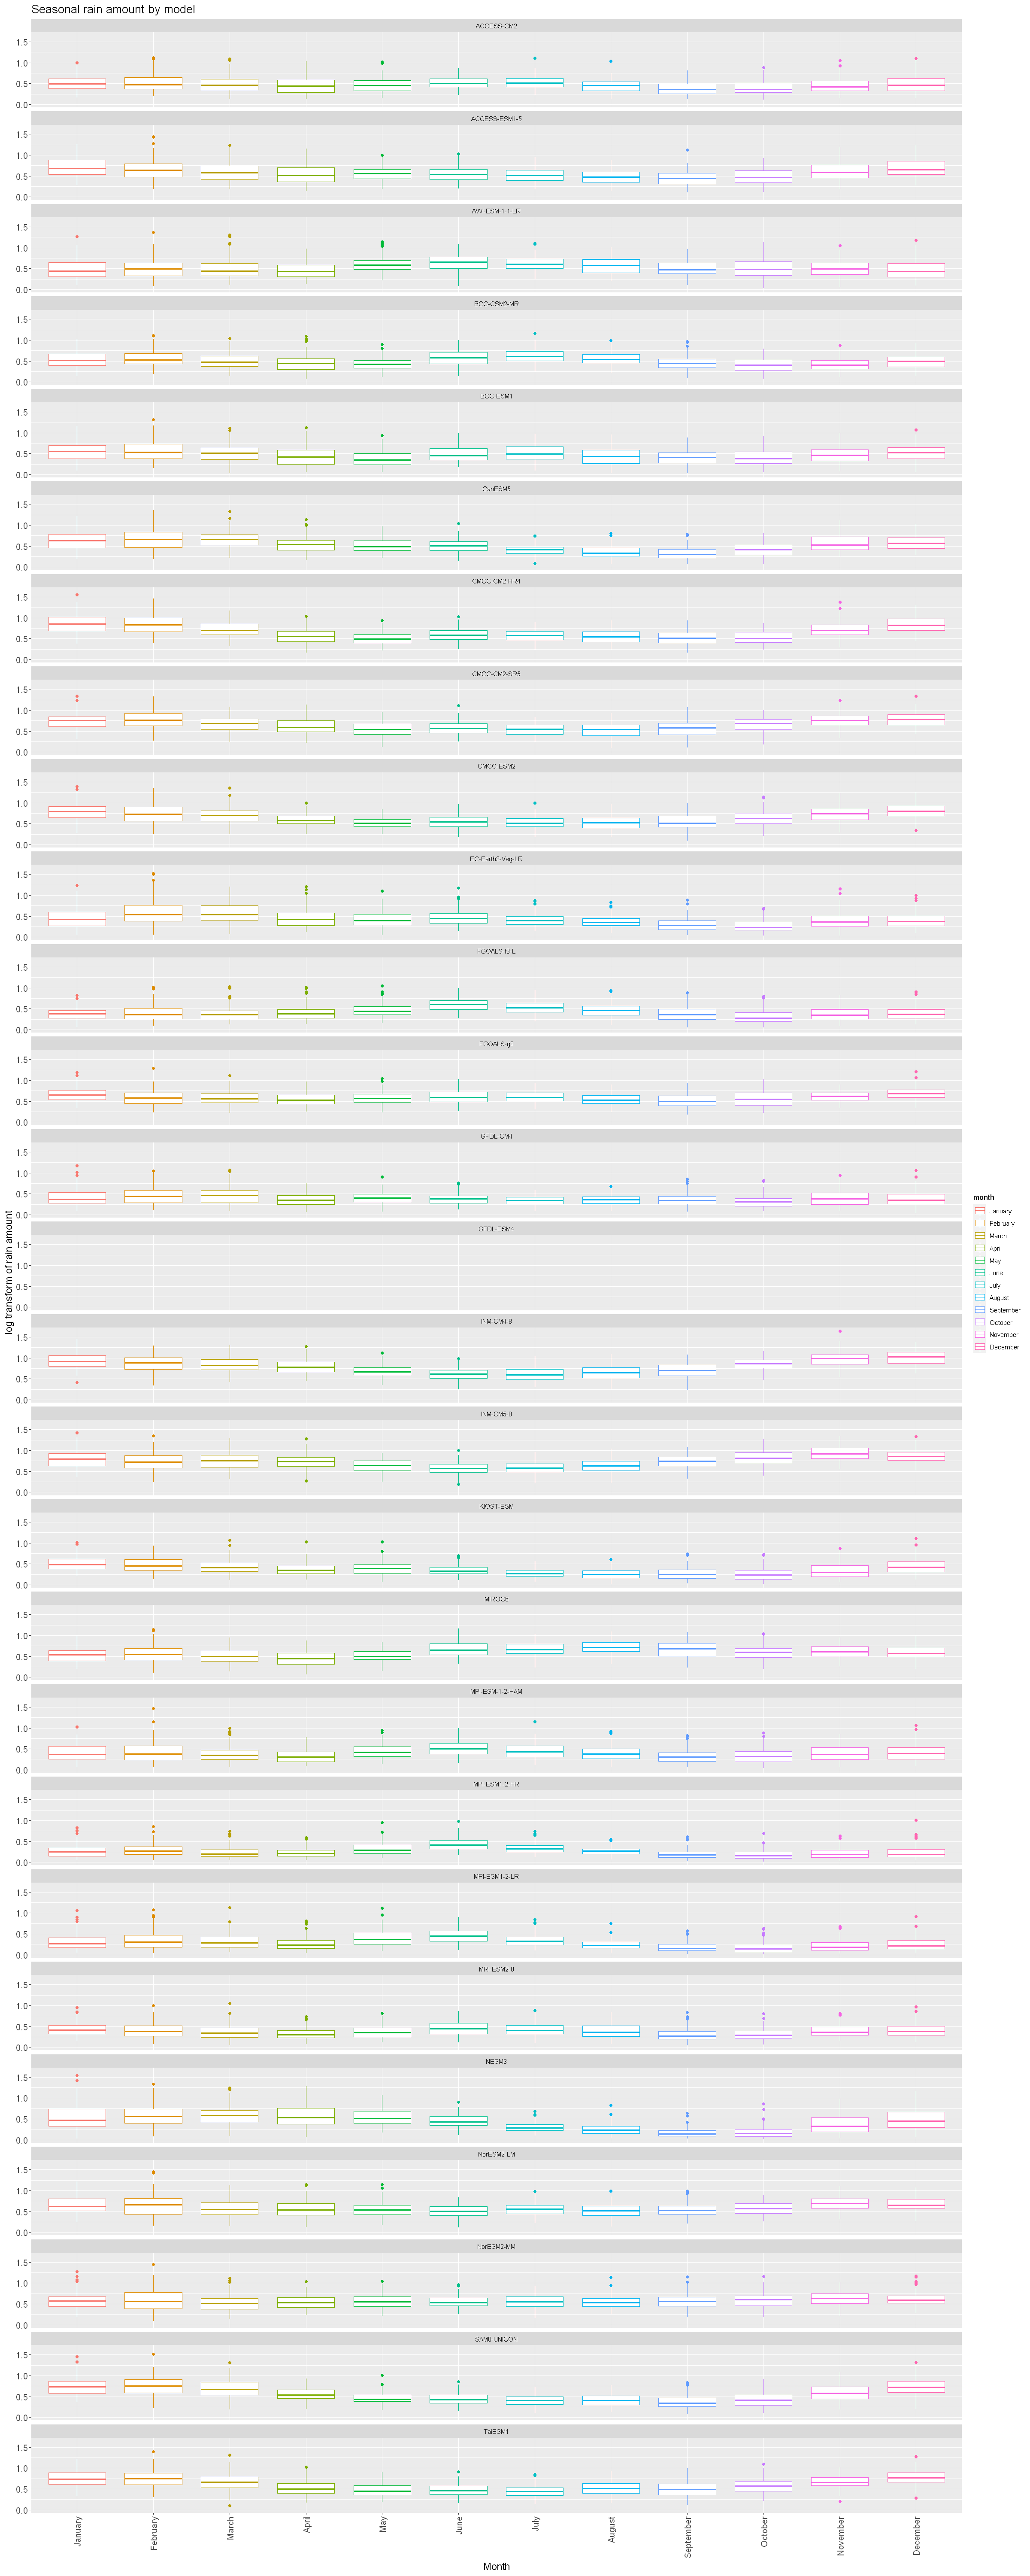

In [12]:
options(repr.plot.width=20, repr.plot.height=50)
by_model_plot <-ggplot(dfm, aes(x=month, y=log_rain, color=month)) +
                  geom_boxplot() +
                  labs(x = "Month", 
                       y = "log transform of rain amount", 
                       title = "Seasonal rain amount by model") +
                  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), 
                       plot.title = element_text(size = 16),
                       axis.text = element_text(size = 12),
                       axis.title = element_text(size = 14)) + 
                  facet_wrap(~model, ncol = 1)       
by_model_plot